In [1]:
import numpy as np
import matplotlib.pyplot as plt

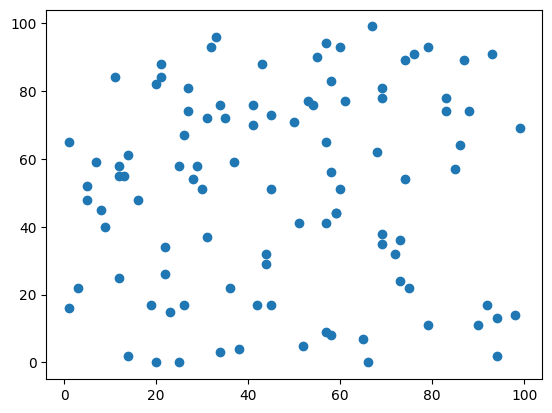

In [13]:
x = []
y = []
for num in range(100):
    x.append(np.random.randint(0, 100))
    
for num in range(100):
    y.append(np.random.randint(0, 100))

plt.figure("scatterplot")
plt.scatter(x, y)

In [59]:
def temp_rateofchange(h, A, m_c, c_c, T_out, T_c):  # Returns rate of change of coffee temperature.
    result = (h*A*(T_out - T_c)) / (m_c*c_c)
    print("Rate of change of the coffee temperature is, dT_c/dt = ", result)
    return result

In [60]:
temp_rateofchange(5, 0.04, 0.35, 4200, 25, 40)

Rate of change of the coffee temperature is, dT_c/dt =  -0.0020408163265306124


-0.0020408163265306124

In [61]:
temp_rateofchange(5, 0.04, 0.35, 4200, 5, 40)

Rate of change of the coffee temperature is, dT_c/dt =  -0.004761904761904762


-0.004761904761904762

In [71]:
time_array = []
for num in range(1, 700):
    time_array.append(num * 60)
def coffee_temp_array(h, A, m_c, c_c, T_out, T_c0, time_array):
    temperature_array = []
    for time in time_array:
        temperature = ((T_c0 - T_out) * np.exp(-(h*A*time)/(m_c*c_c))) + T_out
        temperature_array.append(temperature)
    return temperature_array

Text(0.5, 1.0, 'Coffee temperature (*C)')

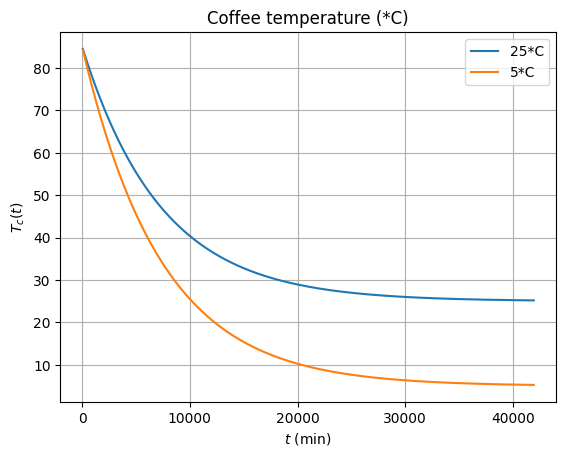

In [76]:
coffee_25 = coffee_temp_array(h = 5, A = 0.04, m_c = 0.35, c_c = 4200, T_out = 25, T_c0 = 85, time_array = time_array)
coffee_5 = coffee_temp_array(h = 5, A = 0.04, m_c = 0.35, c_c = 4200, T_out = 5, T_c0 = 85, time_array = time_array)
plt.figure("coffee")
plt.plot(time_array, coffee_25, label = "25*C")
plt.plot(time_array, coffee_5, label = "5*C")
plt.legend()
plt.grid(True)
plt.ylabel("$T_c(t)$")
plt.xlabel("$t$ (min)")
plt.title("Coffee temperature (*C)")

In [79]:
# Rabbits and foxes

def dr_dt_0(a, b, r_0, f_0):
    result = a*r_0 - b*r_0*f_0
    print("Population growth of rabbits at t_0 =", result)
    return result

def df_dt_0(m, c, b, r_0, f_0):
    result = -m*f_0 + c*b*r_0*f_0
    print("Population growth of foxes at t_0 =", result)
    return result

In [80]:
dr_dt_0(2.0, 0.01, 500, 100)

Population growth of rabbits at t_0 = 500.0


500.0

In [81]:
df_dt_0(1.0, 0.1, 0.01, 500, 100)

Population growth of foxes at t_0 = -50.0


-50.0

In [82]:
dr_dt_0(2.0, 0.01, 500, 350)

Population growth of rabbits at t_0 = -750.0


-750.0

In [83]:
df_dt_0(1.0, 0.1, 0.01, 500, 350)

Population growth of foxes at t_0 = -175.0


-175.0

In [85]:
u = [1, 2, 3]
v = [4, 5, 6]
w = [u[0]+v[0], u[1]+v[1], u[2]+v[2]] # i.e. w = [5,7,9]

print(u + v)
print(w)

[1, 2, 3, 4, 5, 6]
[5, 7, 9]


In [86]:
u = [1, 2, 3]
v = [2*u[0], 2*u[1], 2*u[2]] # i.e. v = [2,4,6]

print(2*u)
print(v)

[1, 2, 3, 1, 2, 3]
[2, 4, 6]


In [94]:
A = [ [1,2,3], [4,5,6] ]
print(A[1][1])

5


In [95]:
#print(A[1,1])
# TypeError: list indices must be integers or slices, not tuple

In [96]:
A[:][0]

[1, 2, 3]

In [99]:
def evalf(u, t):
    """
    args:
        u (float list): current state with u[0] = v and u[1] = w
        t (float): current time

    returns:
        float list for forcing f, where du/dt = f(u, t)
    """
    # unpack state list
    v = u[0]
    w = u[1]

    #### BEGIN SOLUTION ####
    f = []
    f_0 = -100*v + w + t
    f_1 = -v + 2*w - t**3
    f.append(f_0)
    f.append(f_1)
    return f
    #### END SOLUTION ####


In [107]:
evalf([1, 1], 2)
mylist = []
for t in range(100):
    mylist.append(evalf([1, 1], t))
np.array(mylist)
mylist = np.transpose(mylist)

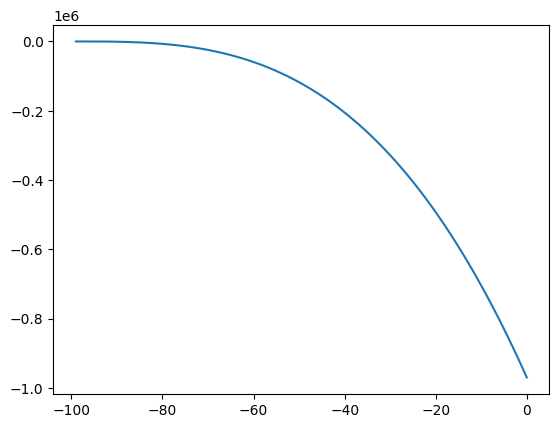

In [108]:
plt.figure("evalf")
plt.plot(mylist[0], mylist[1])

In [109]:
import copy

class IVP(object):
    def __init__(self, uI, tI, tF, p, f):
        """
        Args:
            uI (float list): initial condition of state.
            tI (float): initial time.
            tF (float): final time.
            p (dictionary): set of fixed parameters.
            f (function): takes as input u,t,p and returns du/dt
        """

        self._uI = uI[:]
        self._tI = tI
        self._tF = tF
        self._p  = copy.deepcopy(p)
        self._f  = f
        self._M  = len(uI)

    def evalf(self, u, t):
        """
        Args:
            u (float list): current solution.
            t (float): current time.

        Returns:
            float list: f(u,t,p).
        """

        return self._f(u, t, self._p)